# Unit 6 - Numerical Differentiation

## Task 1

Find 1st and 2nd Derivative of Prandtl-Meyer Function

In [38]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

# denote symbols for function
n, m, g = symbols(r'\nu M \gamma')

# function
n = sqrt((g+1)/(g-1)) * atan(sqrt((g-1)/(g+1) * (m**2 - 1))) - atan(sqrt(m**2 - 1))

n

sqrt((\gamma + 1)/(\gamma - 1))*atan(sqrt((M**2 - 1)*(\gamma - 1)/(\gamma + 1))) - atan(sqrt(M**2 - 1))

In [2]:
# Take 1st Derivative
dndm = diff(n, m)

dndm

M*sqrt((\gamma + 1)/(\gamma - 1))*sqrt((M**2 - 1)*(\gamma - 1)/(\gamma + 1))/((M**2 - 1)*((M**2 - 1)*(\gamma - 1)/(\gamma + 1) + 1)) - 1/(M*sqrt(M**2 - 1))

In [3]:
# Take 2nd Derivative 
d2ndm2 = diff(n, m, 2)
d2ndm2

-2*M**2*sqrt((\gamma + 1)/(\gamma - 1))*sqrt((M**2 - 1)*(\gamma - 1)/(\gamma + 1))*(\gamma - 1)/((M**2 - 1)*(\gamma + 1)*((M**2 - 1)*(\gamma - 1)/(\gamma + 1) + 1)**2) - M**2*sqrt((\gamma + 1)/(\gamma - 1))*sqrt((M**2 - 1)*(\gamma - 1)/(\gamma + 1))/((M**2 - 1)**2*((M**2 - 1)*(\gamma - 1)/(\gamma + 1) + 1)) + sqrt((\gamma + 1)/(\gamma - 1))*sqrt((M**2 - 1)*(\gamma - 1)/(\gamma + 1))/((M**2 - 1)*((M**2 - 1)*(\gamma - 1)/(\gamma + 1) + 1)) + (M**2 - 1)**(-3/2) + 1/(M**2*sqrt(M**2 - 1))

## Task 2

Plot Derivate Approximations Against 1st and 2nd Derivative

In [39]:
def central_difference(f,m,dm,order):
    # Create array of zeros
    df = np.zeros(len(m))
    if order == 1: # choose equation for first derivative
        for i in range(len(m)):
            df[i] = (f(m[i]+dm) - f(m[i]-dm)) / (2*dm)
    elif order == 2: # choose equation for second derivative
        for i in range(len(m)):
            df[i] = (f(m[i]+dm) - 2*f(m[i]) + f(m[i]-dm)) / (dm**2)
    return df

In [40]:
def first_forward(f,m,dm,order):
    # Create array of zeros
    df = np.zeros(len(m))
    if order == 1: # choose equation for first derivative
        for i in range(len(m)):
            df[i] = (f(m[i]+dm) - f(m[i])) / dm
    elif order == 2: # choose equation for second derivative
        for i in range(len(m)):
            df[i] = (f(m[i]+2*dm) - 2*f(m[i]+dm) + f(m[i])) / (dm**2)
    return df

In [41]:
def second_forward(f,m,dm,order):
    # Create array of zeros
    df = np.zeros(len(m))
    if order == 1: # choose equation for first derivative
        for i in range(len(m)):
            df[i] = (-f(m[i]+2*dm) + 4*f(m[i]+dm) - 3*f(m[i])) / (2*dm)
    elif order == 2: # choose equation for second derivative
        for i in range(len(m)):
            df[i] = (-f(m[i]+3*dm) + 4*f(m[i]+2*dm) - 5*f(m[i]+dm) + 2*f(m[i])) / (dm**2)
    return df

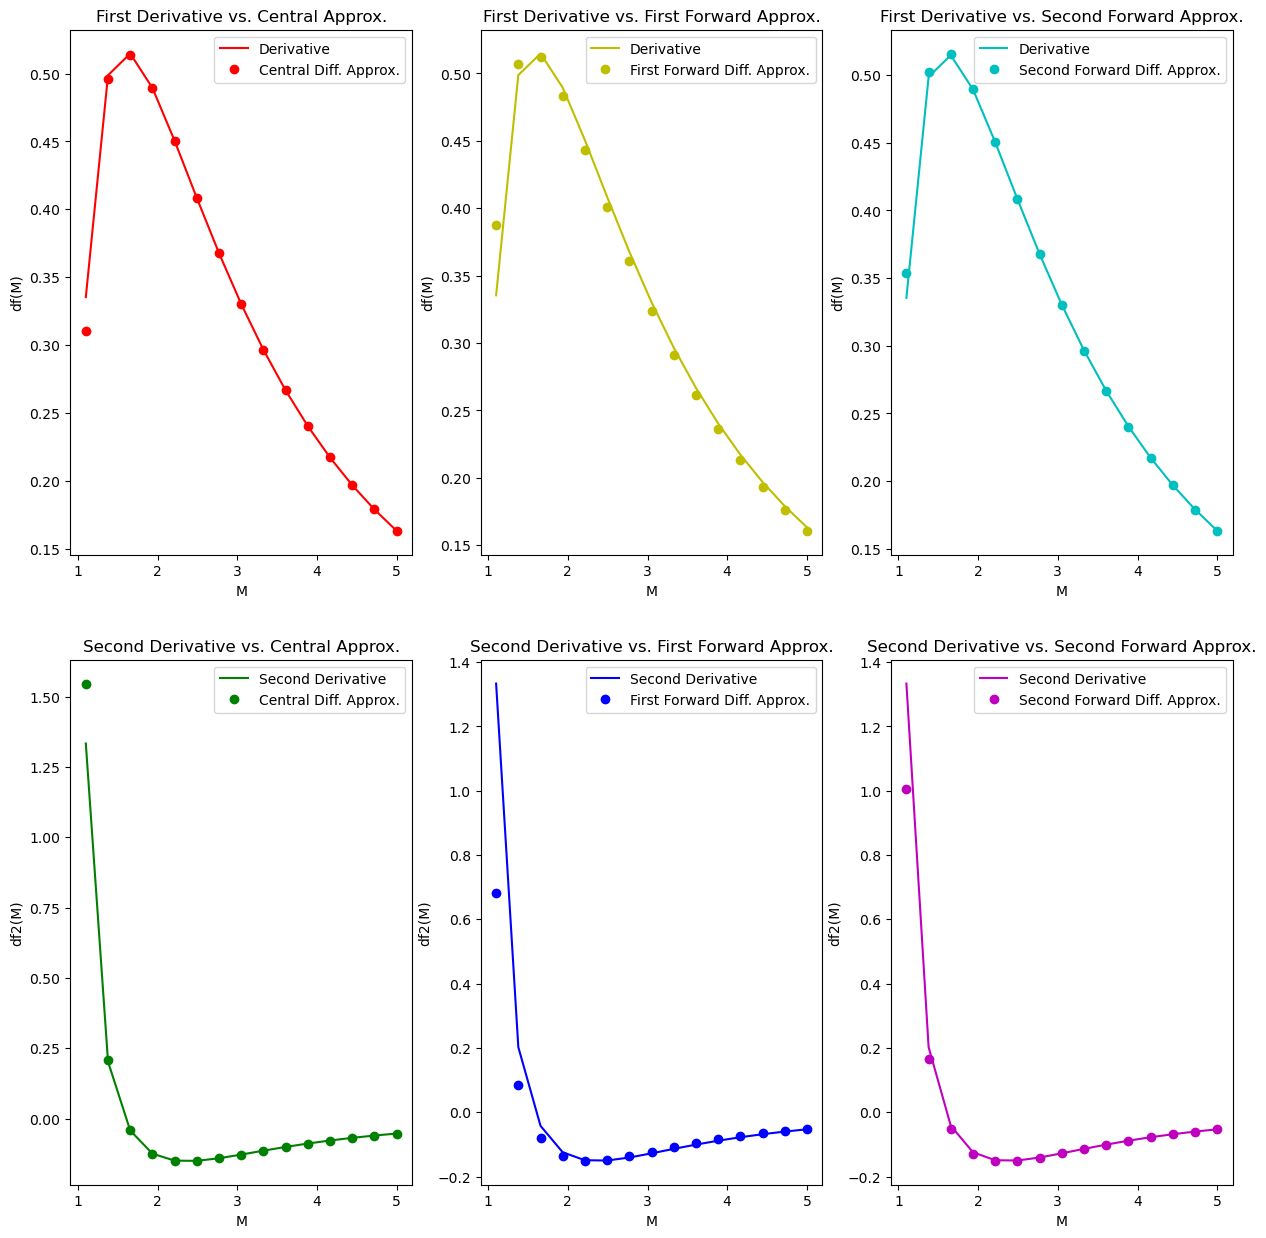

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# initialize values
M = np.linspace(1.1,5,15)
gamma = 1.4
dm = 0.1

# Initialize function and derivatives
def f(m,g=gamma): return np.sqrt((g+1)/(g-1)) * np.arctan(np.sqrt((g-1)/(g+1) * (m**2 - 1))) - np.arctan(np.sqrt(m**2 - 1))
def df(M,gamma=gamma): return 2*np.sqrt(M**2-1) / (M*(gamma*M**2 - M**2 + 2))
def df2(M,gamma=gamma): return 2*(-2*(M**4)*gamma + 2*M**4 + 3*(M**2)*gamma - 3*M**2 + 2) \
                        / (((M**2)*((M**2)*gamma - M**2 + 2)**2) * np.sqrt(M**2-1))
dF = df(M)
dF2 = df2(M)

# Create 6 subplots
fig, ax = plt.subplots(2,3,figsize=(15,15))

ax[0,0].plot(M,dF,'r',label="Derivative")
ax[0,0].plot(M,central_difference(f,M,dm,1),'ro',label="Central Diff. Approx.")
ax[0,0].set_title("First Derivative vs. Central Approx.")
ax[0,0].set_xlabel("M")
ax[0,0].set_ylabel("df(M)")
ax[0,0].legend(loc="upper right")

ax[1,0].plot(M,dF2,'g',label="Second Derivative")
ax[1,0].plot(M,central_difference(f,M,dm,2),'go',label="Central Diff. Approx.")
ax[1,0].set_title("Second Derivative vs. Central Approx.")
ax[1,0].set_xlabel("M")
ax[1,0].set_ylabel("df2(M)")
ax[1,0].legend(loc="upper right")

ax[0,1].plot(M,dF,'y',label="Derivative")
ax[0,1].plot(M,first_forward(f,M,dm,1),'yo',label="First Forward Diff. Approx.")
ax[0,1].set_title("First Derivative vs. First Forward Approx.")
ax[0,1].set_xlabel("M")
ax[0,1].set_ylabel("df(M)")
ax[0,1].legend(loc="upper right")

ax[1,1].plot(M,dF2,'b',label="Second Derivative")
ax[1,1].plot(M,first_forward(f,M,dm,2),'bo',label="First Forward Diff. Approx.")
ax[1,1].set_title("Second Derivative vs. First Forward Approx.")
ax[1,1].set_xlabel("M")
ax[1,1].set_ylabel("df2(M)")
ax[1,1].legend(loc="upper right")

ax[0,2].plot(M,dF,'c',label="Derivative")
ax[0,2].plot(M,second_forward(f,M,dm,1),'co',label="Second Forward Diff. Approx.")
ax[0,2].set_title("First Derivative vs. Second Forward Approx.")
ax[0,2].set_xlabel("M")
ax[0,2].set_ylabel("df(M)")
ax[0,2].legend(loc="upper right")

ax[1,2].plot(M,dF2,'m',label="Second Derivative")
ax[1,2].plot(M,second_forward(f,M,dm,2),'mo',label="Second Forward Diff. Approx.")
ax[1,2].set_title("Second Derivative vs. Second Forward Approx.")
ax[1,2].set_xlabel("M")
ax[1,2].set_ylabel("df2(M)")
ax[1,2].legend(loc="upper right")

plt.show()

## Task 3 

Plot Total Error Against M For Different Delta M Values

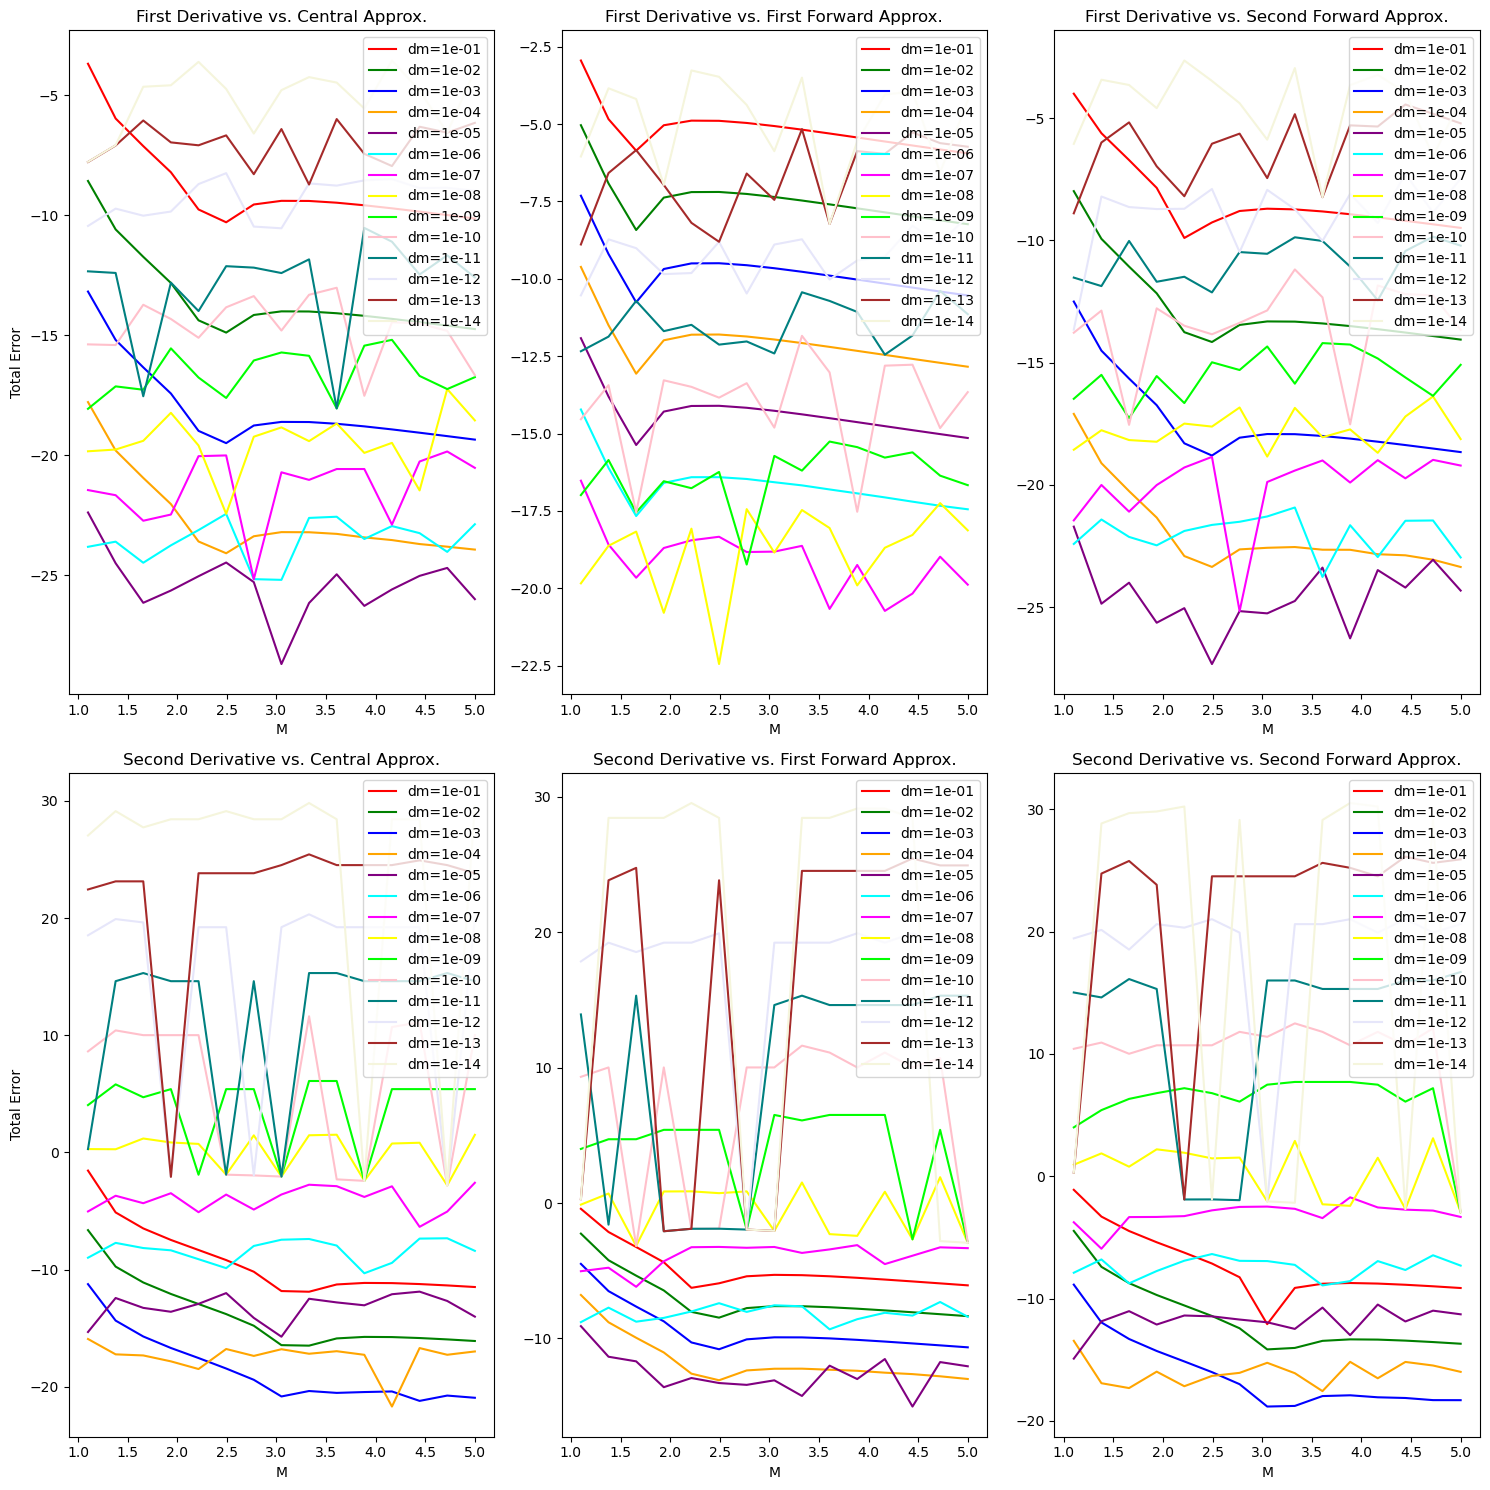

In [43]:
# initialize arrays and lists for plotting
dm = [0.1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14]
a = np.zeros((len(M),len(dm)))
b = np.zeros((len(M),len(dm)))
c = np.zeros((len(M),len(dm)))
d = np.zeros((len(M),len(dm)))
e = np.zeros((len(M),len(dm)))
g = np.zeros((len(M),len(dm)))

# colors for each dm
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'lime', 'pink', 'teal', 'lavender', 'brown', 'beige']

# Fill in arrays w/ values for plotting
for j in range(len(dm)):
    for i in range(len(M)):
            a[i,j] = np.log(np.abs(df(M)[i]-central_difference(f,M,dm[j],1)[i]))  
            b[i,j] = np.log(np.abs(df2(M)[i]-central_difference(f,M,dm[j],2)[i]))
            c[i,j] = np.log(np.abs(df(M)[i]-first_forward(f,M,dm[j],1)[i]))
            d[i,j] = np.log(np.abs(df2(M)[i]-first_forward(f,M,dm[j],2)[i]))
            e[i,j] = np.log(np.abs(df(M)[i]-second_forward(f,M,dm[j],1)[i]))
            g[i,j] = np.log(np.abs(df2(M)[i]-second_forward(f,M,dm[j],2)[i]))

# Create 6 subplots
fig, ax = plt.subplots(2,3,figsize=(15,15))

for i in range(len(dm)): # Plot each dm
    ax[0,0].plot(M,a[:,i],color=colors[i],label=f'dm={dm[i]:.0e}')
ax[0,0].set_title("First Derivative vs. Central Approx.")
ax[0,0].set_xlabel("M")
ax[0,0].legend(loc="upper right")
ax[0,0].set_ylabel("Total Error")

for i in range(len(dm)):
    ax[1,0].plot(M,b[:,i],color=colors[i],label=f'dm={dm[i]:.0e}')
ax[1,0].set_title("Second Derivative vs. Central Approx.")
ax[1,0].set_xlabel("M")
ax[1,0].set_ylabel("Total Error")
ax[1,0].legend(loc="upper right")

for i in range(len(dm)):
    ax[0,1].plot(M,c[:,i],color=colors[i],label=f'dm={dm[i]:.0e}')
ax[0,1].set_title("First Derivative vs. First Forward Approx.")
ax[0,1].set_xlabel("M")
ax[0,1].legend(loc="upper right")

for i in range(len(dm)):
    ax[1,1].plot(M,d[:,i],color=colors[i],label=f'dm={dm[i]:.0e}')
ax[1,1].set_title("Second Derivative vs. First Forward Approx.")
ax[1,1].set_xlabel("M")
ax[1,1].legend(loc="upper right")

for i in range(len(dm)):
    ax[0,2].plot(M,e[:,i],color=colors[i],label=f'dm={dm[i]:.0e}')
ax[0,2].set_title("First Derivative vs. Second Forward Approx.")
ax[0,2].set_xlabel("M")
ax[0,2].legend(loc="upper right")

for i in range(len(dm)):
    ax[1,2].plot(M,g[:,i],color=colors[i],label=f'dm={dm[i]:.0e}')
ax[1,2].set_title("Second Derivative vs. Second Forward Approx.")
ax[1,2].set_xlabel("M")
ax[1,2].legend(loc="upper right")

plt.tight_layout()
plt.show()

## Task 4

Plot Total Error Against Delta M Values For Each Approximation

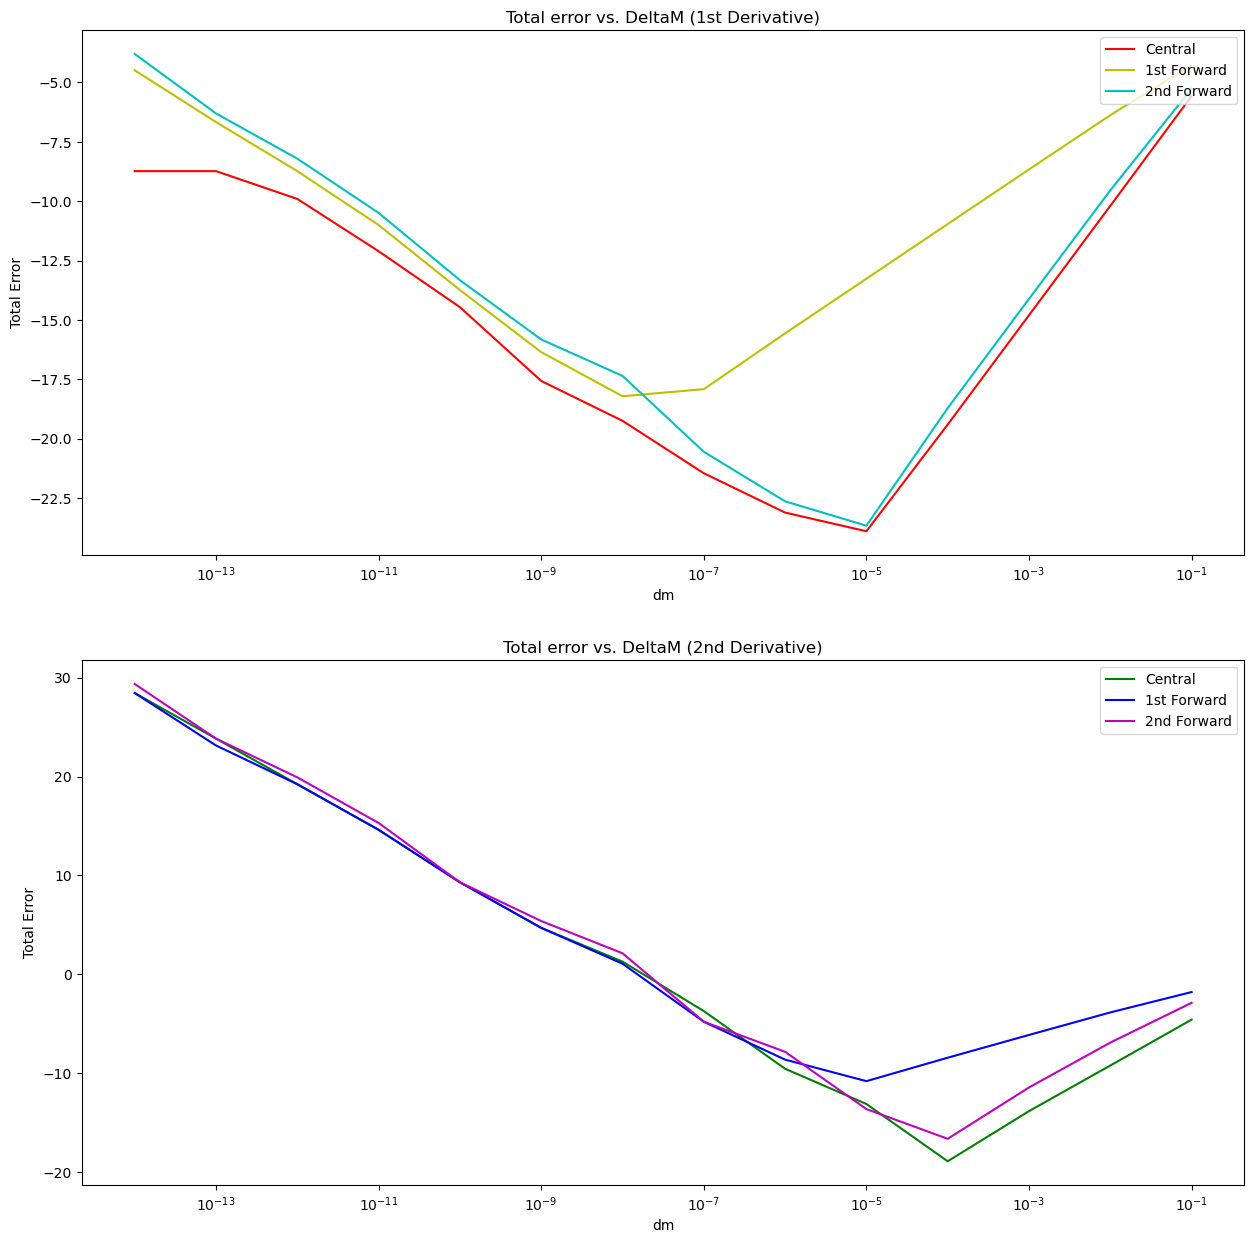

In [44]:

M = 1.3  # Define a single M value

b = np.zeros((len(dm), 6)) # initialize array

# plot total error for each dm value
for i in range(len(dm)):
    b[i, 0] = np.log(np.abs(df(M) - central_difference(f, np.array([M]), dm[i], 1)[0]))
    b[i, 1] = np.log(np.abs(df2(M) - central_difference(f, np.array([M]), dm[i], 2)[0]))
    b[i, 2] = np.log(np.abs(df(M) - first_forward(f, np.array([M]), dm[i], 1)[0]))
    b[i, 3] = np.log(np.abs(df2(M) - first_forward(f, np.array([M]), dm[i], 2)[0]))
    b[i, 4] = np.log(np.abs(df(M) - second_forward(f, np.array([M]), dm[i], 1)[0]))
    b[i, 5] = np.log(np.abs(df2(M) - second_forward(f, np.array([M]), dm[i], 2)[0]))

# Create 2 subplots
fig, ax = plt.subplots(2,1,figsize=(15,15))

# Create a log plot
ax[0].semilogx(dm,b[:,0],'r',label="Central")
ax[0].set_title("Total error vs. DeltaM (1st Derivative)")
ax[0].set_xlabel("dm")
ax[0].set_ylabel("Total Error")

ax[1].semilogx(dm,b[:,1],'g',label="Central")
ax[1].set_title("Total error vs. DeltaM (2nd Derivative)")
ax[1].set_xlabel("dm")
ax[1].set_ylabel("Total Error")

ax[0].semilogx(dm,b[:,2],'y',label="1st Forward")
ax[0].set_xlabel("dm")

ax[1].semilogx(dm,b[:,3],'b',label="1st Forward")
ax[1].set_xlabel("dm")

ax[0].semilogx(dm,b[:,4],'c',label="2nd Forward")
ax[0].legend(loc="upper right")
ax[0].set_xlabel("dm")

ax[1].semilogx(dm,b[:,5],'m',label="2nd Forward")
ax[1].legend(loc="upper right")
ax[1].set_xlabel("dm")

plt.show()



### The optimal delta M value for the 2nd derivative is 10e-4 or 1e-3 (they're equal) because that is where the Total Error vs. dm graphs reach their minimum value. You can also see this in Task 3, as the 1e-3 graph is near the bottom for every second derivative approximation. For the first derivative, the optimal delta M is 10e-5 or 1e-4, as that is where the first derivative approximation graphs reach their minimum. 